In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50startups/50_Startups_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/50startups/50_Startups_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [4]:
df.drop(columns=['Unnamed: 0','State'],inplace=True)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.30,136897.90,471784.20,192261.93
1,162597.80,151377.69,443898.63,191792.16
2,153441.61,101145.65,407934.64,191050.49
3,144372.51,118671.95,383199.72,182902.09
4,142107.44,91391.87,366168.52,166188.04


In [6]:
df.shape

(50, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [10]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

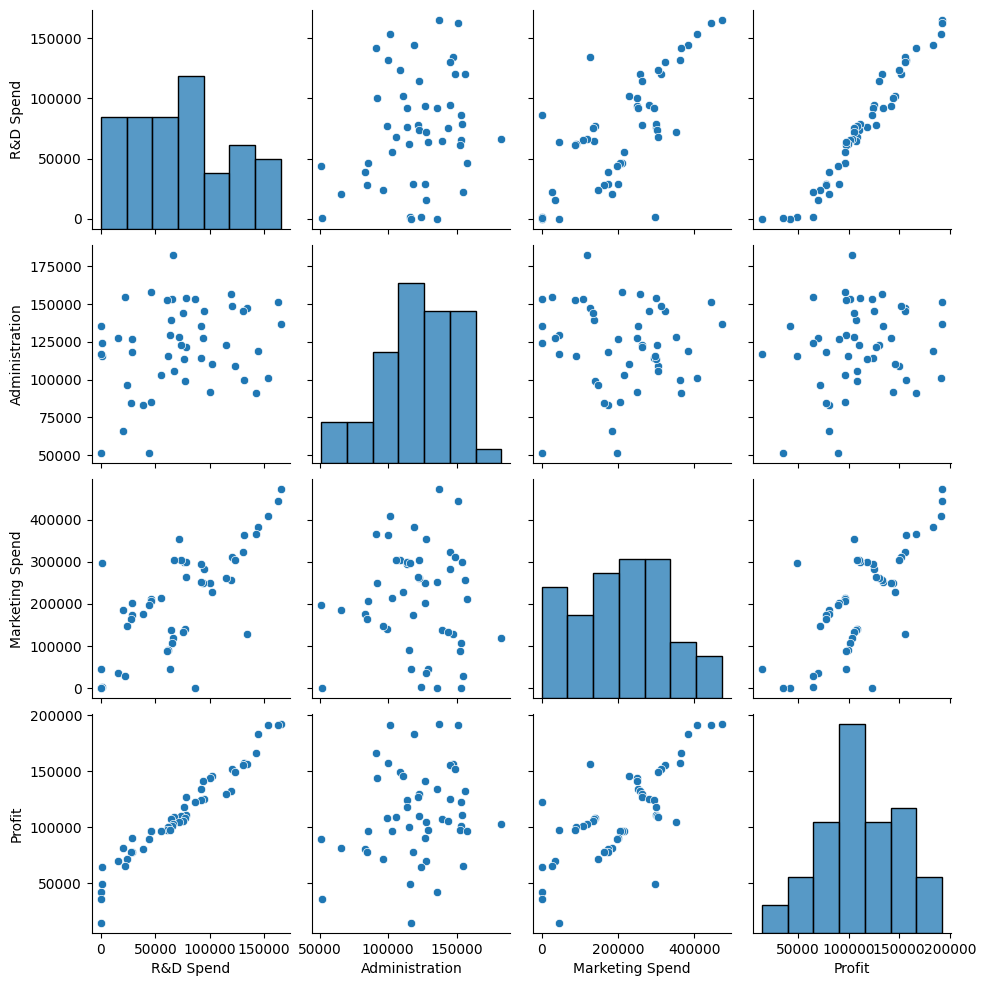

In [11]:
import seaborn as sns
sns.pairplot(df)

In [12]:
X= df[['R&D Spend','Administration','Marketing Spend']]

In [13]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.30,136897.90,471784.20
1,162597.80,151377.69,443898.63
2,153441.61,101145.65,407934.64
3,144372.51,118671.95,383199.72
4,142107.44,91391.87,366168.52
5,131877.00,99814.81,362861.46
6,134615.56,147198.97,127716.92
7,130298.23,145530.16,323876.78
8,120542.62,148719.05,311613.39
9,123334.98,108679.27,304981.72


In [14]:
X.shape

(50, 3)

In [15]:
y = df['Profit']

In [16]:
y

0     192261.93
1     191792.16
2     191050.49
3     182902.09
4     166188.04
5     156991.22
6     156122.61
7     155752.70
8     152211.87
9     149760.06
10    146122.05
11    144259.50
12    141585.62
13    134307.45
14    132602.75
15    129917.14
16    126993.03
17    125370.47
18    124267.00
19    122776.96
20    118474.13
21    111313.12
22    110352.35
23    108734.09
24    108552.14
25    107404.44
26    105733.64
27    105008.41
28    103282.48
29    101004.74
30     99937.69
31     97483.66
32     97427.94
33     96779.02
34     96712.90
35     96479.61
36     90708.29
37     89949.24
38     81229.16
39     81005.86
40     78240.01
41     77798.93
42     71498.59
43     69759.08
44     65200.43
45     64926.18
46     49490.85
47     42559.83
48     35673.51
49     14681.50
Name: Profit, dtype: float64

In [17]:
y.shape

(50,)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X_train

,R&D Spend,Administration,Marketing Spend
8,120542.62,148719.05,311613.39
3,144372.51,118671.95,383199.72
6,134615.56,147198.97,127716.92
41,27893.02,84710.87,164470.81
46,1315.56,115816.31,297114.56
47,0.10,135427.02,0.10
15,114523.71,122616.94,261776.33
9,123334.98,108679.27,304981.72
16,78013.21,121597.65,264346.16
24,77044.11,99281.44,140574.91


In [20]:
X_train.shape

(37, 3)

In [21]:
y_train

8     152211.87
3     182902.09
6     156122.61
41     77798.93
46     49490.85
47     42559.83
15    129917.14
9     149760.06
16    126993.03
24    108552.14
34     96712.90
31     97483.66
0     192261.93
44     65200.43
27    105008.41
33     96779.02
5     156991.22
29    101004.74
11    144259.50
36     90708.29
1     191792.16
21    111313.12
2     191050.49
43     69759.08
35     96479.61
23    108734.09
40     78240.01
10    146122.05
22    110352.35
18    124267.00
49     14681.50
20    118474.13
7     155752.70
42     71498.59
14    132602.75
28    103282.48
38     81229.16
Name: Profit, dtype: float64

In [22]:
y_train.shape

(37,)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 0.92677074,  0.99706915,  0.68026002],
       [ 1.42728466, -0.19886227,  1.29883063],
       [ 1.2223534 ,  0.93656709, -0.90877173],
       [-1.01920612, -1.55057749, -0.59118489],
       [-1.57742895, -0.31252214,  0.55497702],
       [-1.60505838,  0.46802121, -2.01236051],
       [ 0.80035185, -0.0418442 ,  0.24962277],
       [ 0.9854204 , -0.59658983,  0.6229564 ],
       [ 0.03349923, -0.08241387,  0.27182842],
       [ 0.01314463, -0.97064124, -0.79766707],
       [-0.62994291,  1.35428993, -0.19087808],
       [-0.32097317,  1.15559889, -1.25007525],
       [ 1.86787316,  0.52656502,  2.06428062],
       [-1.13924558,  1.23935083, -1.76752292],
       [-0.09053785,  0.16702458,  1.03946689],
       [-0.43948461, -0.82034333, -0.15772172],
       [ 1.16483373, -0.94941211,  1.12308967],
       [-0.22710589,  1.16873909, -1.08658805],
       [ 0.50941708, -1.26878647,  0.14565818],
       [-1.00301569,  0.13485112, -0.27444296],
       [ 1.8100817 ,  1.10288805,  1.823

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(n_jobs=-1)

In [27]:
model

LinearRegression(n_jobs=-1)

In [28]:
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [29]:
model.coef_

array([38531.2052596 , -2239.2433705 ,  3525.89090786])

In [30]:
model.intercept_

114279.72756756756

In [31]:
# prediction for test data
y_pred= model.predict(X_test)

In [32]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [33]:
print(f"MSE:{round(mse,2)},\nMAE:{round(mae,2)},\nRMSE:{round(rmse,2)}")

MSE:86644383.24,
MAE:7432.79,
RMSE:9308.3


In [34]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [35]:
score

0.9193827032400599

In [36]:
# adjusted r-squared
1 - (1- score)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8925102709867465

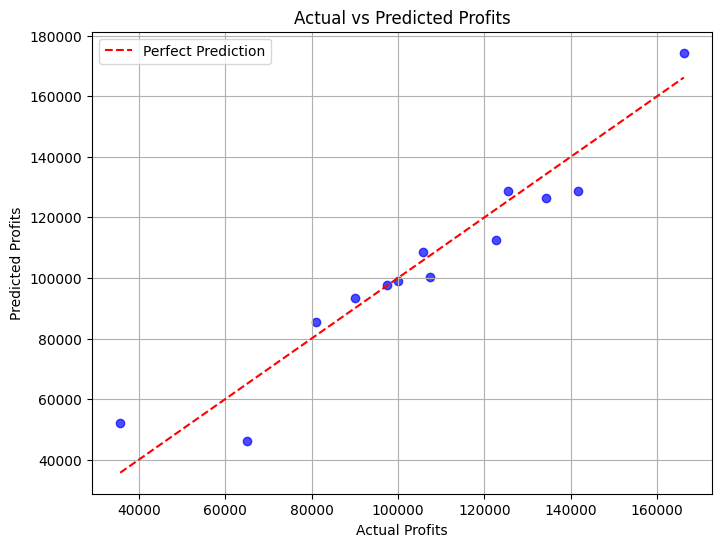

In [37]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Profits")
plt.xlabel("Actual Profits")
plt.ylabel("Predicted Profits")
plt.legend()
plt.grid(True)
plt.show()